In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Amazon Sale Report.csv')

C:\Users\mathe\AppData\Local\Temp\ipykernel_13140\2474663059.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv')


Tratar valores ausentes e duplicatas

In [3]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [4]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
49051,49051,408-4858463-2356347,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0385,J0385-KR-M,kurta,...,INR,888.0,RAJAHMUNDRY,ANDHRA PRADESH,533126.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
49077,49077,402-7697834-2682766,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3654,JNE3654-TP-XXL,Top,...,INR,371.0,CHENNAI,TAMIL NADU,600042.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
49081,49081,402-7031777-0396341,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3798,JNE3798-KR-XS,Western Dress,...,INR,771.0,NEDUMANGAD,KERALA,695541.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
49082,49082,408-1235521-4337163,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0152,J0152-DR-L,Western Dress,...,INR,0.0,LEH,JAMMU & KASHMIR,194101.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
49083,49083,403-3845187-4421165,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0157,J0157-DR-XL,Western Dress,...,INR,690.0,PIMPRI CHINCHWAD,MAHARASHTRA,411027.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False


In [5]:
qtySum = df.Qty.sum()
amountSum = df.Amount.sum()
QtyCategory = df.Category.value_counts()
topCategory = QtyCategory.idxmax()
statusValues = df.Status.value_counts()
B2BValues = df.B2B.value_counts()
top_5_states = df['ship-state'].value_counts().nlargest(5)
df['Date'] = pd.to_datetime(df['Date'])
df['Days'] = df['Date'].dt.strftime('%d')
DeliveredCategory = df[df['Status'] == 'Shipped - Delivered to Buyer']



C:\Users\mathe\AppData\Local\Temp\ipykernel_13140\738533069.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


Distribuição dos Status de Entrega

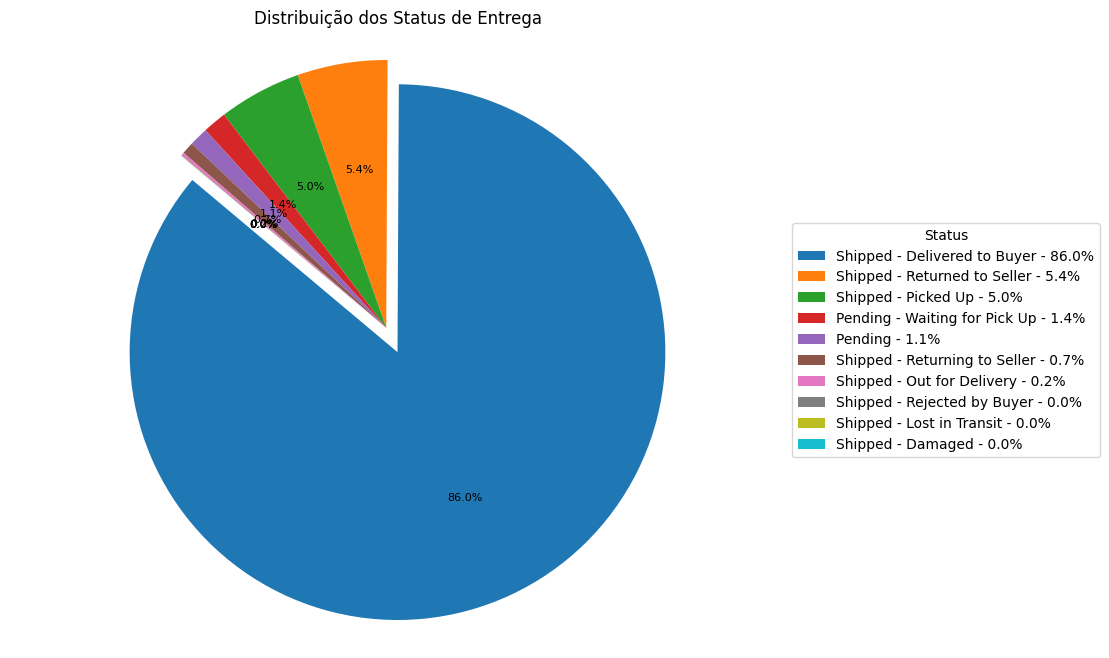

In [14]:
labels = statusValues.index
sizes = statusValues.values
explode = [0.1 if label == 'Shipped - Delivered to Buyer' else 0 for label in labels]
percentages = [f'{size / sum(sizes) * 100:.1f}%' for size in sizes]
labels_with_percentages = [f'{label} - {percentage}' for label, percentage in zip(labels, percentages)]

plt.figure(figsize=(10,8))
wedges, texts, autotexts = plt.pie(sizes, autopct='%1.1f%%',startangle=140, explode=explode, textprops=dict(color="black"))

for autotext in autotexts:
    autotext.set_fontsize(8)

plt.axis('equal')
plt.legend(wedges, labels_with_percentages, title="Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribuição dos Status de Entrega')
plt.show()

Categorias


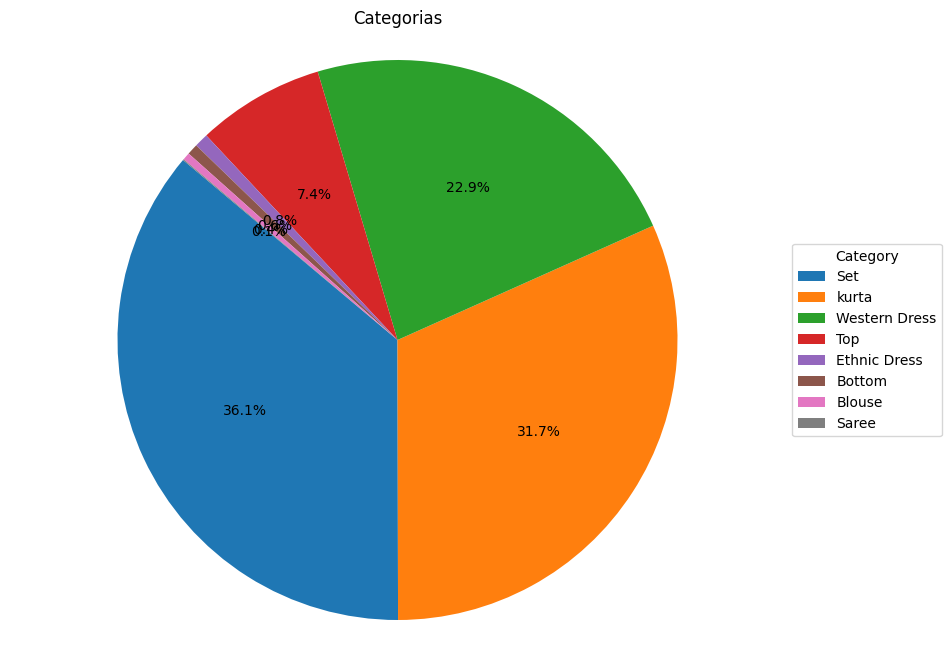

In [7]:
QtyCategory
plt.figure(figsize=(10,8))

wedges, texts, autotexts = plt.pie(QtyCategory.values, autopct='%1.1f%%',startangle=140, textprops=dict(color='black'))

for autotext in autotexts:
    autotext.set_fontsize(10)

plt.title('Categorias')
plt.axis('equal')
plt.legend(wedges, QtyCategory.index, title="Category", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Volume de Vendas:

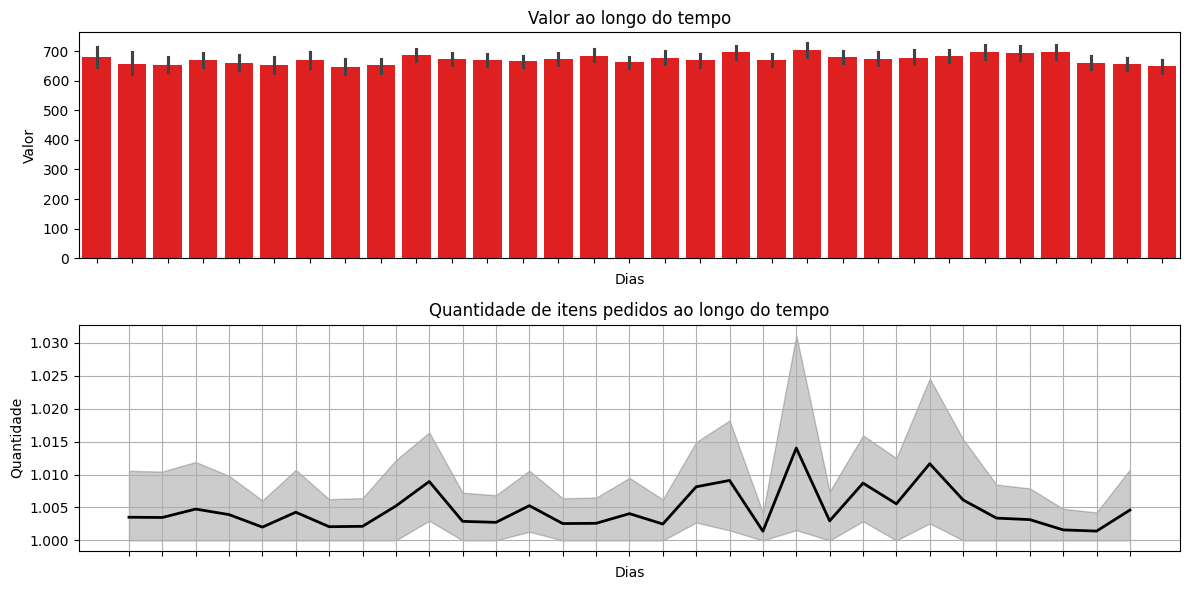

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

sns.barplot(x='Days', y='Amount', data=df, ax=axs[0],color='r')
axs[0].set_title('Valor ao longo do tempo')
axs[0].set_xlabel('Dias')
axs[0].set_ylabel('Valor')
axs[0].set_xticklabels([])

sns.lineplot(x='Days', y='Qty', data=df, ax=axs[1], color='black', linewidth=2.0)
axs[1].set_title('Quantidade de itens pedidos ao longo do tempo')
axs[1].set_ylabel('Quantidade')
axs[1].set_xlabel('Dias')
axs[1].set_xticklabels([])
plt.grid(True)

plt.tight_layout()

plt.show()

Quantidade de categorias

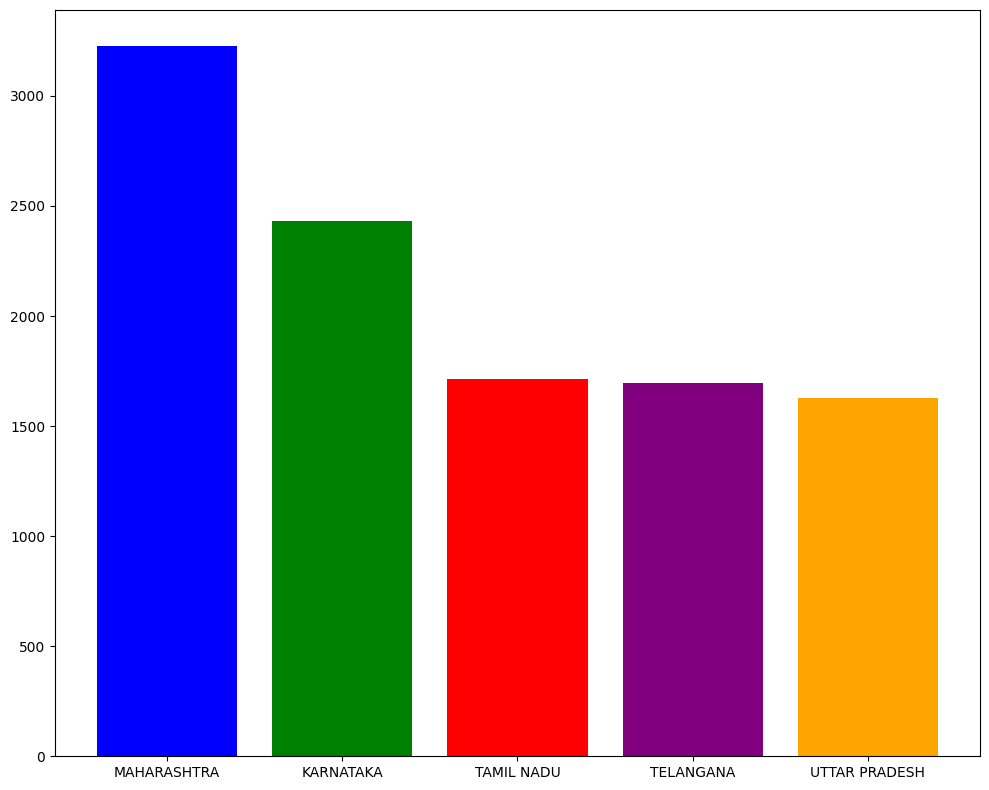

In [9]:
cores = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(10,8))
plt.bar(top_5_states.index,top_5_states.values, color=cores)

plt.tight_layout()
plt.show()